## Week 5

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('vg_sales_ratings.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


The column values are analysed using the pd.info() method. It gives details about each column's datatypes and also the number of non-null values.

In [3]:
print(data.shape, data.columns)

(16719, 16) Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


`User_Score` should be float, but is showing as object

In [5]:
data.User_Score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Similarly `Rating` should be numeric to be usable for prediction

In [6]:
data.Rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

### What is ESRB rating?

There are 5 ratings.

- The original ratings were RP, EC, K-A, T, M, and AO. 

- K-A was replaced by E in January 1st, 1998. 

- They added an E10+ rating in March 2nd, 2005

Mapping I have used

- EC is rated as A (5)

- E rated video games are rated A (5).

- E10+ rated video games are rated B (4).

- T rated video games are rated B15 (3).

- M rated video games are rated C (2).

- AO rated video games are rated D (1).

- RP/RP Likely M rated video games are rated (2)

In [7]:
rating_mapping = {'EC': 5, 'E': 5, 'E10+': 4, 'T': 3, 'M': 2, 'AO': 1, 'RP': 2, 'K-A': 5, 0: 0}

data['Rating'].fillna(0, inplace=True)
data['Rating'] = data['Rating'].apply(lambda x: rating_mapping[x])

In [8]:
data.loc[data['User_Score'] == 'tbd', 'User_Score'] = 0

Descriptive analysis of the dataset is performed using the pd.describe() method

In [9]:
data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,Rating
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,16719.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908,2.255278
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326,2.055668
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000,3.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000,4.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000,5.000000


Data seems to be missing in some columns

In [10]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating                0
dtype: int64

In [11]:
cleaned_data = data.drop(['Critic_Count', 'User_Count', 'Developer'], axis=1)
cleaned_data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
User_Score         6704
Rating                0
dtype: int64

In [12]:
platforms = cleaned_data[cleaned_data['Year_of_Release'].isna()].Platform.unique()
platforms

array(['PS2', 'Wii', '2600', 'X360', 'GBA', 'PC', 'PS3', 'PS', 'PSP',
       'XB', 'GB', 'DS', 'GC', '3DS', 'N64', 'PSV'], dtype=object)

In [13]:
values = {}

for platform in platforms:
    values[platform] = int(cleaned_data[cleaned_data['Platform'] == platform]['Year_of_Release'].median())

values

{'PS2': 2005,
 'Wii': 2009,
 '2600': 1982,
 'X360': 2010,
 'GBA': 2003,
 'PC': 2010,
 'PS3': 2011,
 'PS': 1998,
 'PSP': 2009,
 'XB': 2004,
 'GB': 1997,
 'DS': 2008,
 'GC': 2003,
 '3DS': 2013,
 'N64': 1999,
 'PSV': 2014}

In [14]:
def year_filler(row):
    if pd.isna(row.Year_of_Release):
        return values[row.Platform]
    
    return row.Year_of_Release

cleaned_data.Year_of_Release = cleaned_data.apply(year_filler, axis=1)

cleaned_data.Year_of_Release.isna().sum()

0

In [15]:
cleaned_data.Critic_Score.fillna(cleaned_data.Critic_Score.median(), inplace=True)
cleaned_data.User_Score.fillna(cleaned_data.User_Score.median(), inplace=True)


cleaned_data.User_Score = cleaned_data.User_Score.astype('float64')
cleaned_data.User_Score.fillna(cleaned_data.User_Score.min(), inplace=True)
cleaned_data.isna().sum()

Name                2
Platform            0
Year_of_Release     0
Genre               2
Publisher          54
NA_Sales            0
EU_Sales            0
JP_Sales            0
Other_Sales         0
Global_Sales        0
Critic_Score        0
User_Score          0
Rating              0
dtype: int64

In [16]:
cleaned_data.dropna(subset=['Publisher'], inplace=True)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16665 entries, 0 to 16718
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16663 non-null  object 
 1   Platform         16665 non-null  object 
 2   Year_of_Release  16665 non-null  float64
 3   Genre            16663 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16665 non-null  float64
 6   EU_Sales         16665 non-null  float64
 7   JP_Sales         16665 non-null  float64
 8   Other_Sales      16665 non-null  float64
 9   Global_Sales     16665 non-null  float64
 10  Critic_Score     16665 non-null  float64
 11  User_Score       16665 non-null  float64
 12  Rating           16665 non-null  int64  
dtypes: float64(8), int64(1), object(4)
memory usage: 1.8+ MB


In [17]:
cleaned_data.Year_of_Release = cleaned_data.Year_of_Release.astype('int64')

## Week 6

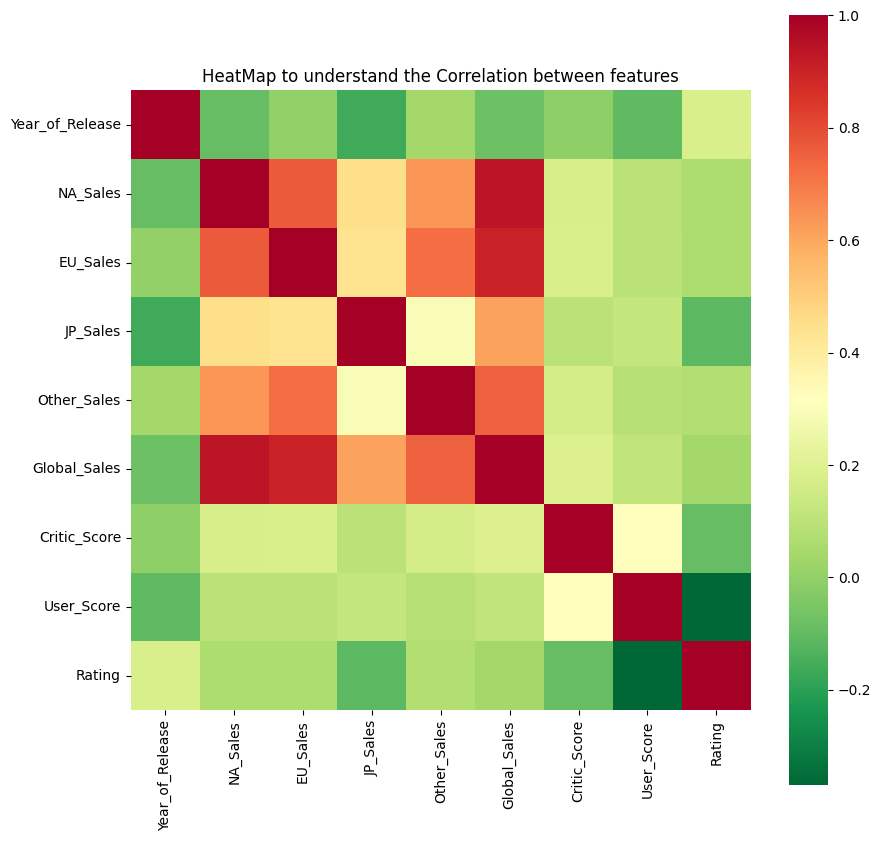

In [18]:
fig, ax = plt.subplots(figsize = (10,10))
cmap = 'RdYlGn_r'
sns.heatmap(cleaned_data.corr(numeric_only=True), square=True, cmap=cmap)
plt.title('HeatMap to understand the Correlation between features')
plt.show()

### What does the graph say?

- NA region is the major market -> Any game's beta testers should be in NA :)
- ??

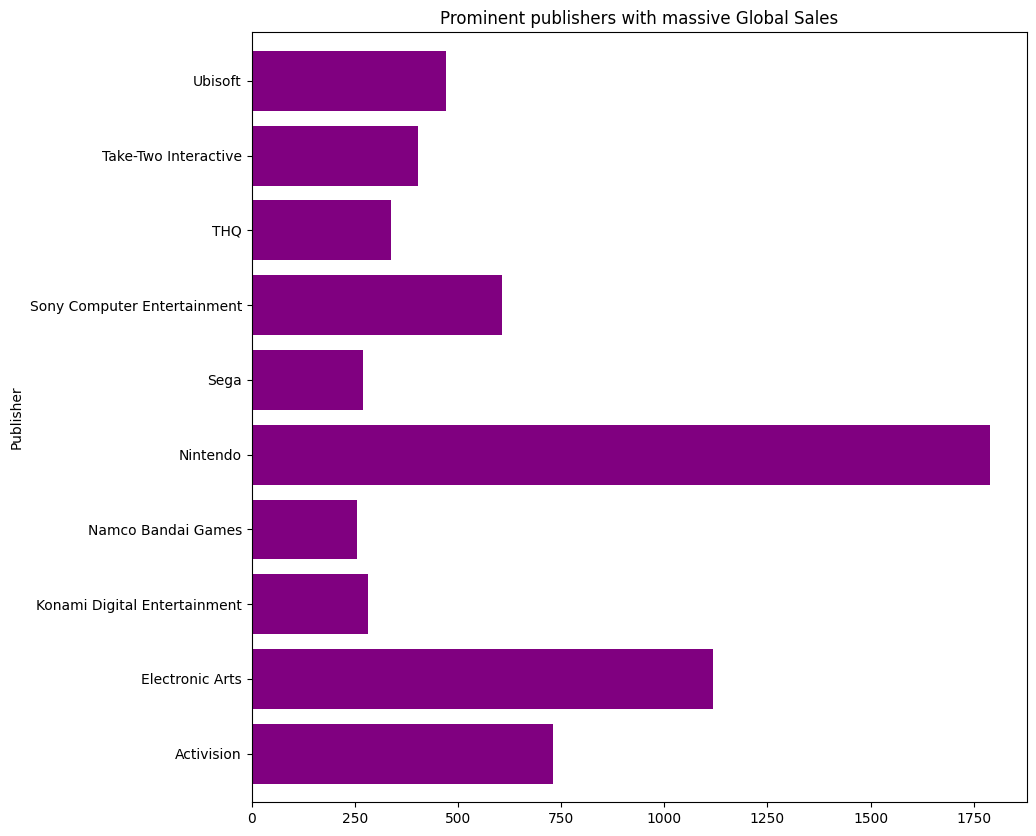

In [19]:
prominent_players = cleaned_data.groupby('Publisher').Global_Sales.sum()
prominent_players = prominent_players[prominent_players > 250]

prominent_players.plot(kind='barh', color='purple', width=0.8, figsize=(10, 10))
plt.title('Prominent publishers with massive Global Sales')
plt.show()

In [20]:
year_dataset = pd.DataFrame()

for sale_type in ['NA_Sales', 'EU_Sales', 'JP_Sales']:
    sales = cleaned_data[[sale_type, 'Year_of_Release']]
    sales.insert(0, 'Type', sale_type)
    sales = sales.rename(columns={sale_type: 'Value'})
    
    year_dataset = pd.concat([year_dataset, sales])
year_dataset.head()

,Type,Value,Year_of_Release
0,NA_Sales,41.36,2006
1,NA_Sales,29.08,1985
2,NA_Sales,15.68,2008
3,NA_Sales,15.61,2009
4,NA_Sales,11.27,1996


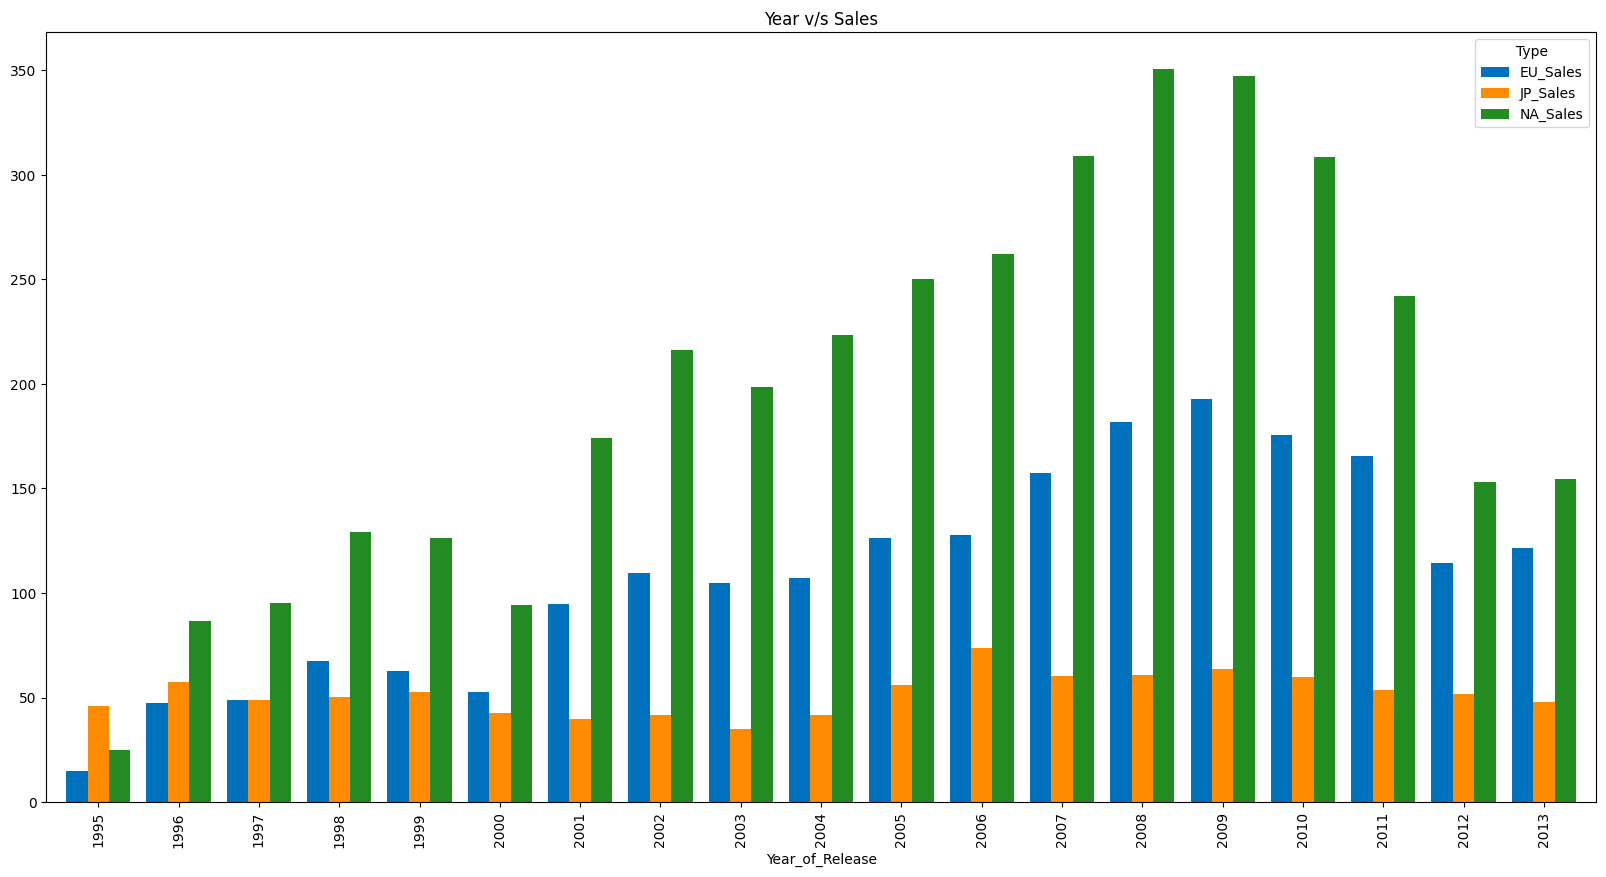

In [21]:
year_dataset = year_dataset.groupby(['Year_of_Release', 'Type']).Value.sum()
year_dataset[45:102].unstack().plot.bar(figsize=(20,10), width=0.8,color=[[0, 0.4470, 0.7410], 'darkorange', 'forestgreen'])
plt.title('Year v/s Sales')
plt.show()

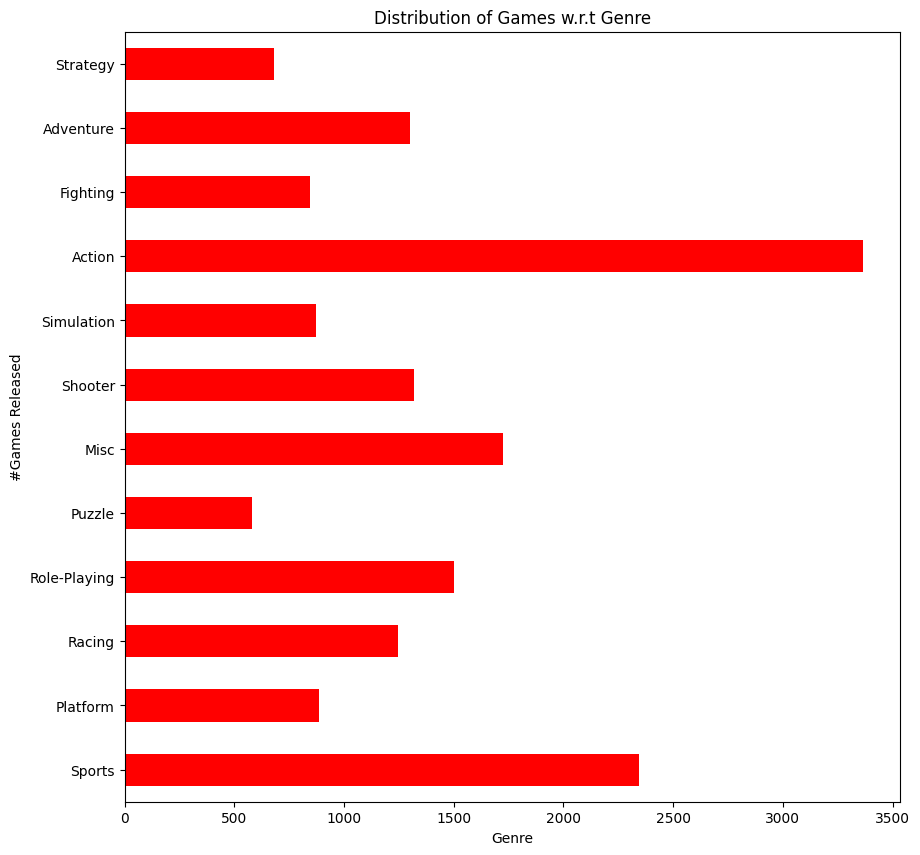

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
cleaned_data.Genre.value_counts(sort=False).plot(kind='barh', color='red')
plt.xlabel('Genre')
plt.ylabel('#Games Released')
plt.title('Distribution of Games w.r.t Genre')

plt.show()

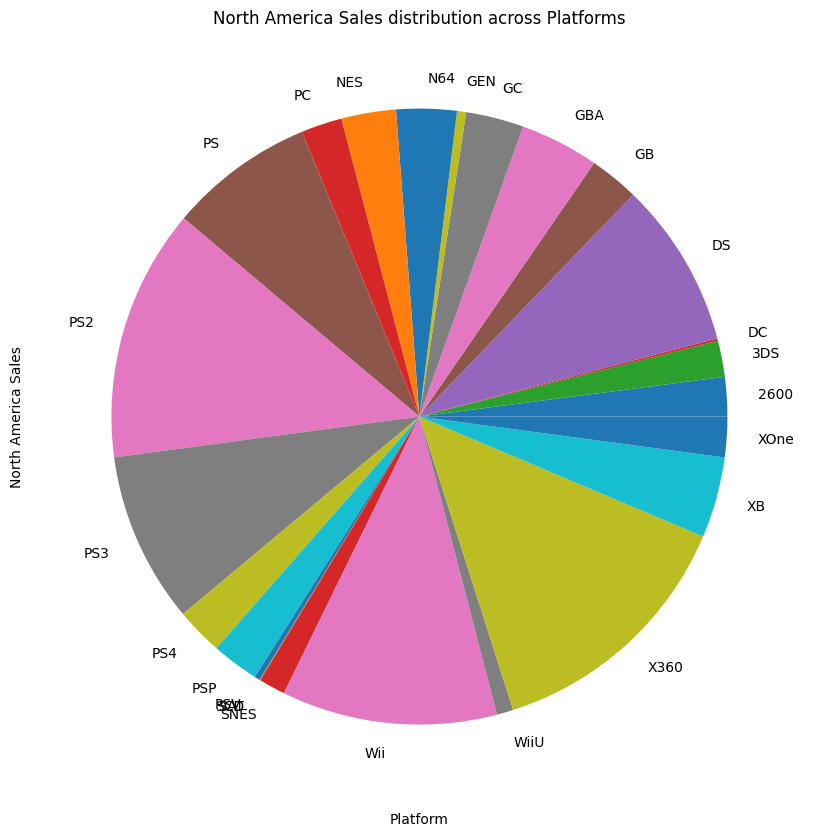

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
cleaned_data.groupby('Platform').NA_Sales.sum().plot(kind='pie')
plt.title('North America Sales distribution across Platforms')
plt.xlabel('Platform')
plt.ylabel('North America Sales')
plt.show()

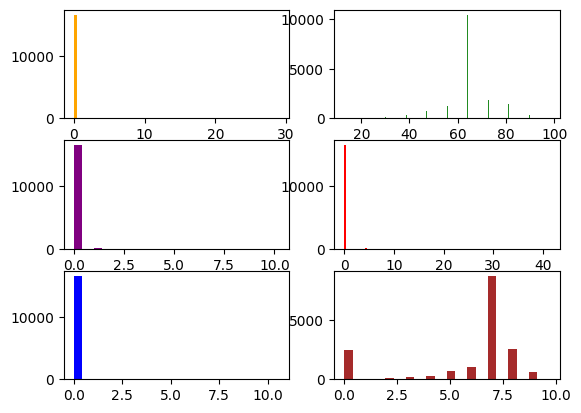

In [24]:
fig, axes = plt.subplots(3, 2)

positions = {'EU_Sales': [0, 0], 'Critic_Score': [0, 1], 'JP_Sales': [1, 0], 'NA_Sales': [1, 1], 'Other_Sales': [2, 0], 'User_Score': [2, 1]}
colors = {'EU_Sales': 'orange', 'Critic_Score': 'forestgreen', 'JP_Sales': 'purple', 'NA_Sales': 'red', 'Other_Sales': 'blue', 'User_Score': 'brown'}

for column in colors:
    position = positions[column]
    axes[position[0], position[1]].hist(cleaned_data[column], color=colors[column], width=0.4)
plt.show()

In [25]:
cleaned_data.JP_Sales.replace({0: 0.001}, inplace=True)
cleaned_data.NA_Sales.replace({0: 0.001}, inplace=True)
cleaned_data.EU_Sales.replace({0: 0.001}, inplace=True)

cleaned_data.Other_Sales.replace({0: 0.001}, inplace=True)

cleaned_data.JP_Sales = np.log(cleaned_data.JP_Sales)
cleaned_data.NA_Sales = np.log(cleaned_data.NA_Sales)
cleaned_data.EU_Sales = np.log(cleaned_data.EU_Sales)

cleaned_data.Other_Sales = np.log(cleaned_data.Other_Sales)

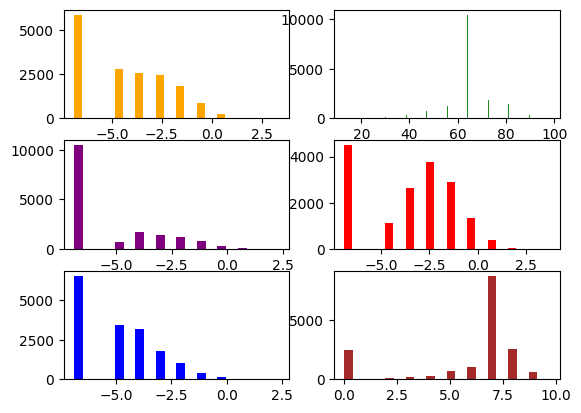

In [26]:
fig, axes = plt.subplots(3, 2)

positions = {'EU_Sales': [0, 0], 'Critic_Score': [0, 1], 'JP_Sales': [1, 0], 'NA_Sales': [1, 1], 'Other_Sales': [2, 0], 'User_Score': [2, 1]}
colors = {'EU_Sales': 'orange', 'Critic_Score': 'forestgreen', 'JP_Sales': 'purple', 'NA_Sales': 'red', 'Other_Sales': 'blue', 'User_Score': 'brown'}

for column in colors:
    position = positions[column]
    axes[position[0], position[1]].hist(cleaned_data[column], color=colors[column], width=0.4)
plt.show()